# Using pandas for Better (and Worse) Data Science

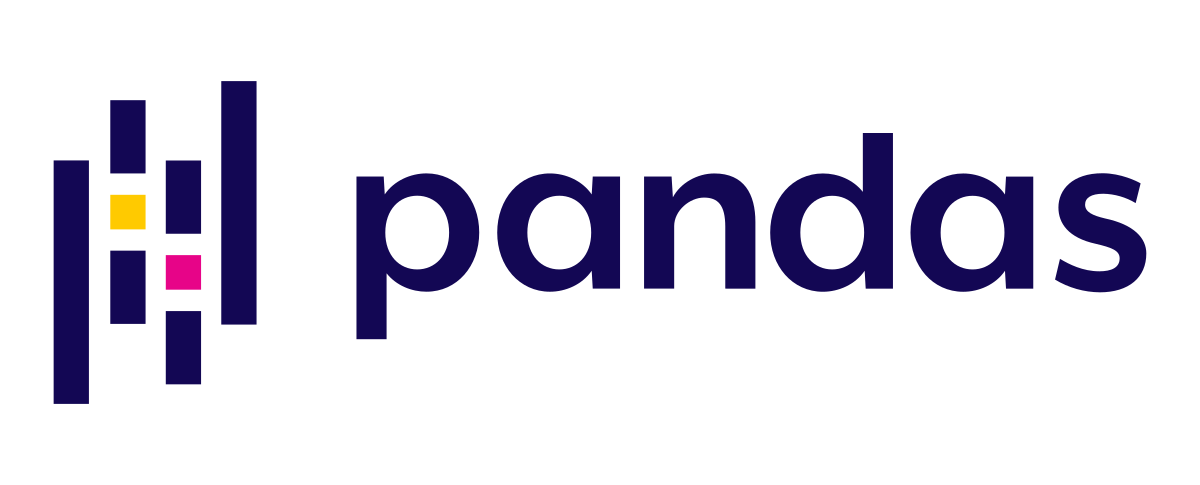

Good data analysis project is all about asking questions, in this notebook we are goinig to answer the following questions:
    1. Do men or women speed more often?
    2. Does gender affect who gets searched during a stop?
    3. During a search, how often is the driver frisked?
    4. Which year had the least number of stops?
    5. How does drug activity change by time of day?
    6. Do most stops occur at night?

***
### **I hope you find this kernel useful and your <font color="red"><b>UPVOTES</b></font> would be highly appreciated**
***

### Instructor: Kevin Markham
This is a kernel that is perceiving the steps from `PyCon 2019` of `Kevin Markham`.

- GitHub: https://github.com/justmarkham
- Twitter: https://twitter.com/justmarkham
- YouTube: https://www.youtube.com/dataschool
- Website: http://www.dataschool.io

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Dataset: Stanford Open Policing Project  

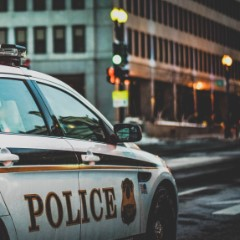

[Stanford Open Policing Project ](https://openpolicing.stanford.edu/)

In [4]:
df = pd.read_csv("data/police_project.csv")
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [6]:
df.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


In [7]:
df.shape

(91741, 15)

In [8]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

- **What does NaN mean?**

> In computing, NaN, standing for not a number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic. 


- **Why might a value be missing?**

> There are many causes of missing values, Missing data can occur because of `nonresponse`, `Attrition`, `governments or private entities`, ...

- **Why mark it as NaN? Why not mark it as a 0 or an empty string or a string saying "Unknown"?**

> We mark missing values as `NaN` to make them distinguish from the original dtype of the feature.

`county_name`  All the data is missing, We will `drop` this column.

# 1. Remove the column that only contains missing values

In [9]:
df.dropna(axis=1, how='all').shape

(91741, 14)

In [10]:
df.drop('county_name', axis=1, inplace=True)

In [11]:
df.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

**Lessons:**

- Pay attention to default arguments
- Check your work
- There is more than one way to do everything in pandas

# 2. Do men or women speed more often?

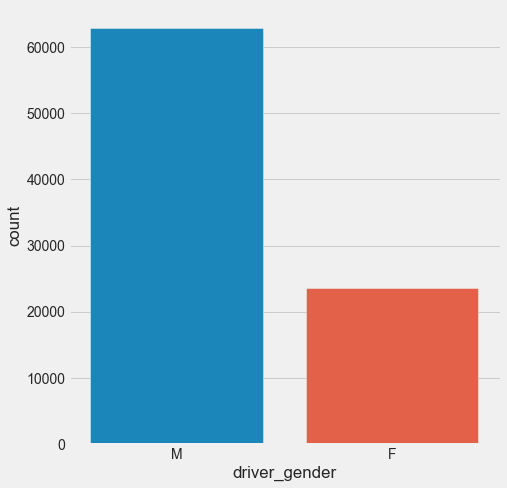

In [12]:
sns.catplot('driver_gender', data=df, kind="count", height=7)

In [13]:
df.driver_gender.value_counts()

M    62895
F    23511
Name: driver_gender, dtype: int64

Responding to this question, we must take consideration of the non-equivalent distribution of the data or use fraction.

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64


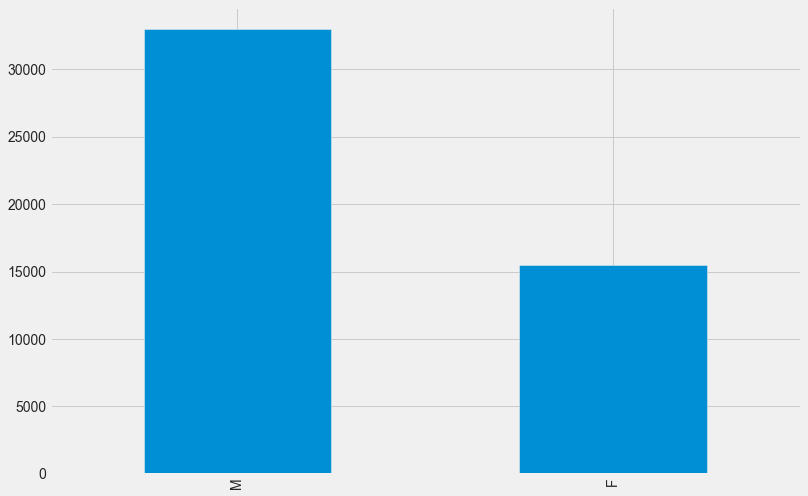

In [14]:
print(df[df.violation == 'Speeding'].driver_gender.value_counts(normalize=True))
plt.figure(figsize=(12, 8))
df[df.violation == 'Speeding'].driver_gender.value_counts().plot(kind="bar")

In [15]:
df.loc[df.violation == "Speeding", "driver_gender"].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

## 2. 1. When a man is pulled over, How often is it for speeding?

In [16]:
df[df.driver_gender == "M"].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

## 2. 2. When a women is pulled over, How often is it for speeding?

In [17]:
df[df.driver_gender == "F"].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

Text(0.5, 1.0, 'Violation of Men')

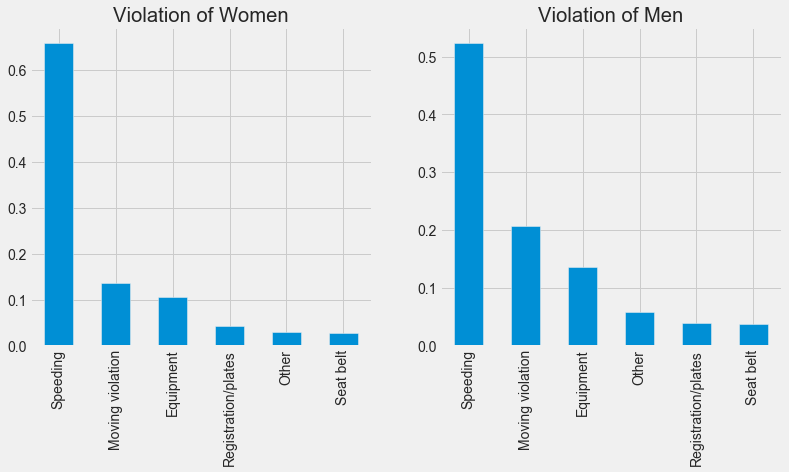

In [18]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
df[df.driver_gender == "F"].violation.value_counts(normalize=True).plot(kind="bar")
plt.title("Violation of Women")

plt.subplot(2, 2, 2)
df[df.driver_gender == "M"].violation.value_counts(normalize=True).plot(kind="bar")
plt.title("Violation of Men")

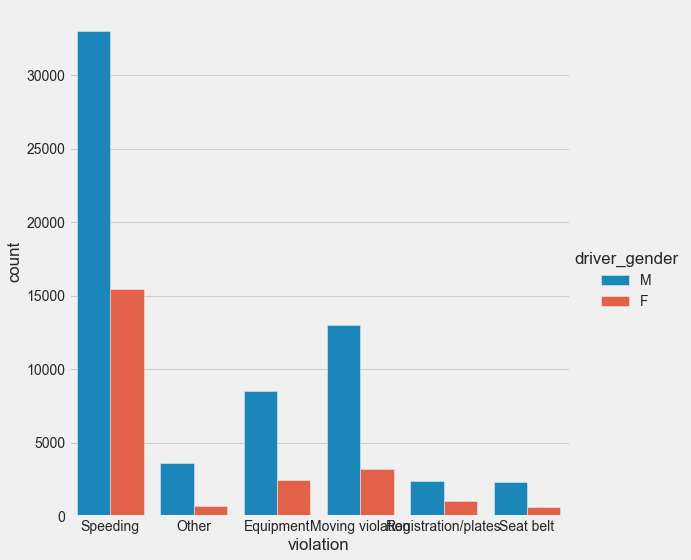

In [19]:
sns.catplot('violation', data=df, hue='driver_gender', kind='count', height=8)

# 3. Does gender affect who gets searched during a stop?

In [20]:
df.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

From all `88545` stoping cases the data only `3196` are searched.

In [21]:
df.loc[df.search_conducted, 'driver_gender'].value_counts()

M    2725
F     471
Name: driver_gender, dtype: int64

From the stopped cases `2725` are `men` and only `471` are women.

In [22]:
df.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

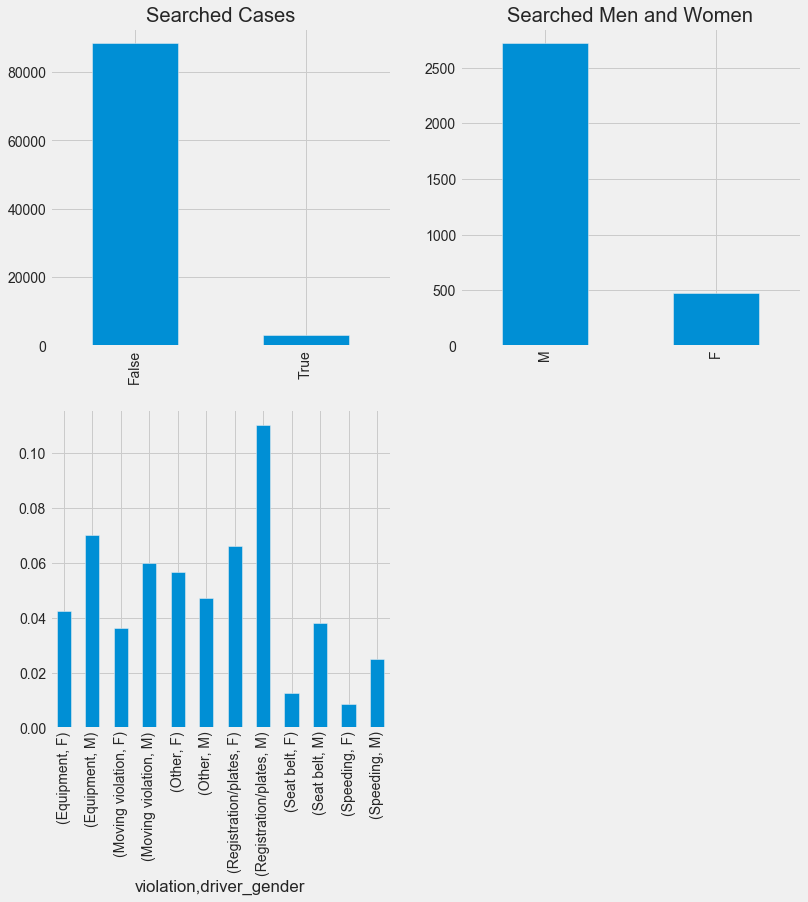

In [23]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
df.search_conducted.value_counts().plot(kind="bar")
plt.title("Searched Cases")

plt.subplot(2, 2, 2)
df.loc[df.search_conducted, 'driver_gender'].value_counts().plot(kind="bar")
plt.title("Searched Men and Women")

plt.subplot(2, 2, 3)
df.groupby(['violation', 'driver_gender']).search_conducted.mean().plot(kind="bar")

Does this prove causation?

**Lessons:**

- Causation is difficult to conclude, so focus on relationships
- Include all relevant factors when studying a relationship

# 4. Why is search_type missing so often?

In [24]:
df.search_type.isnull().sum()

88545

In [25]:
df.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [26]:
df[df.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

`search_type` is missing every time the police don't conduct a search.

In [27]:
df.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonable Suspicion                         11
Inventory,Protective Fris

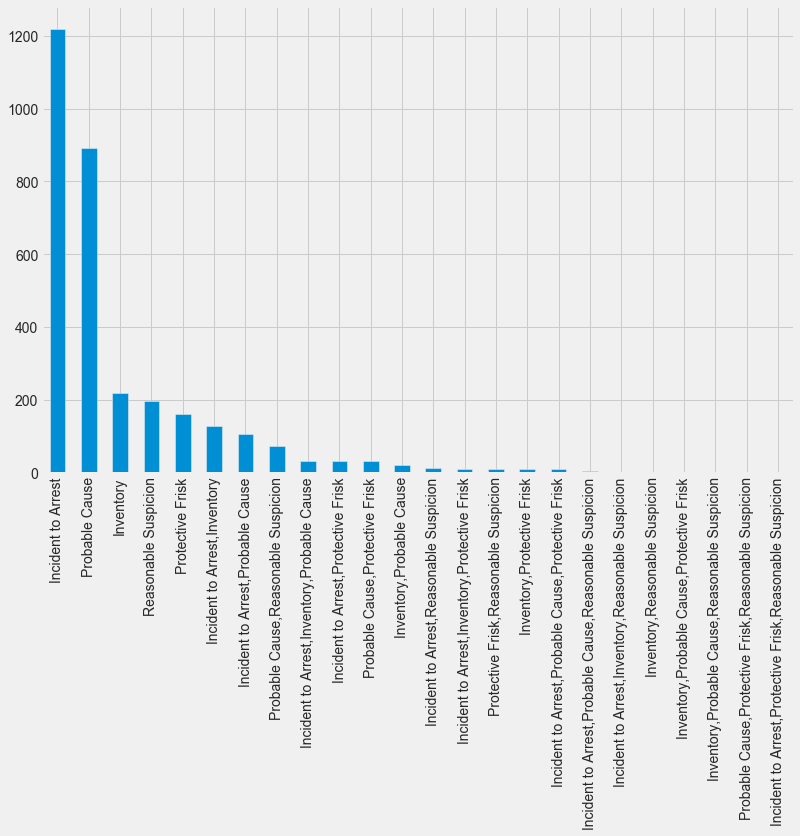

In [28]:
plt.figure(figsize=(12, 8))
df.search_type.value_counts().plot(kind="bar")

**Lessons:**

- Verify your assumptions about your data
- pandas functions ignore missing values by default

# 5. During a search, how often is the driver frisked?

In [29]:
df.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonable Suspicion                         11
Inventory,Protective Fris

In [30]:
counter = 0
for item in df.search_type:
    if type(item) == str and "Protective Frisk" in item:
        counter += 1
print(counter)

274


In [31]:
df.search_type.str.contains('Protective Frisk').sum()

274

In [32]:
df.search_type.str.contains('Protective Frisk').mean()

0.08573216520650813

`8.57%` of the time the driver is frisked.

**Lessons:**

- Use string methods to find partial matches
- Use the correct denominator when calculating rates
- pandas calculations ignore missing values
- Apply the "smell test" to your results

# 6. Which year had the least number of stops?

In [33]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [34]:
print(df.stop_date.dtype)
print(df.stop_time.dtype)

object
object


In [35]:
df.stop_date

0        2005-01-02
1        2005-01-18
2        2005-01-23
3        2005-02-20
4        2005-03-14
            ...    
91736    2015-12-31
91737    2015-12-31
91738    2015-12-31
91739    2015-12-31
91740    2015-12-31
Name: stop_date, Length: 91741, dtype: object

In [36]:
df['stop_date'] = pd.to_datetime(df.stop_date, format="%Y-%M-%d")
df["year"] = df.stop_date.dt.year

In [37]:
df.dtypes

stop_date             datetime64[ns]
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
year                           int64
dtype: object

In [38]:
df.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: year, dtype: int64

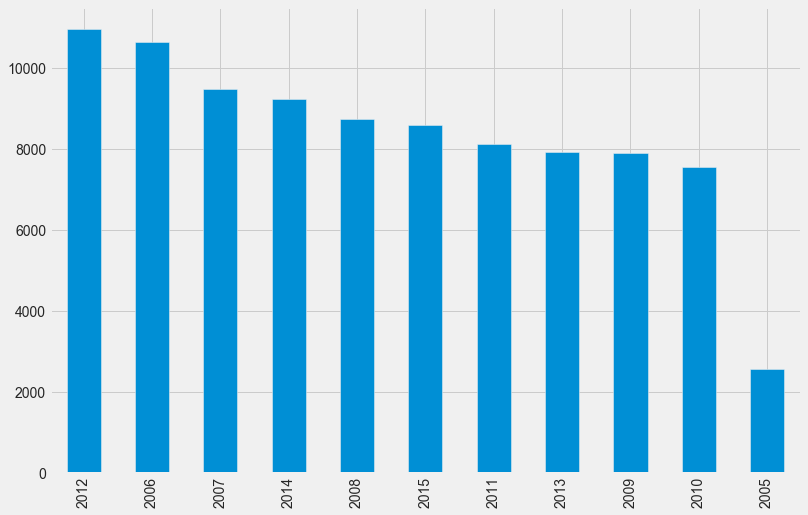

In [39]:
plt.figure(figsize=(12, 8))
df.year.value_counts().plot(kind="bar")

**Lessons:**

- Consider removing chunks of data that may be biased
- Use the datetime data type for dates and times

# 7. How does drug activity change by time of day?

In [40]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'year'],
      dtype='object')

In [41]:
df.drugs_related_stop.value_counts()

False    90926
True       815
Name: drugs_related_stop, dtype: int64

In [42]:
df["stop_time"] = pd.to_datetime(df.stop_time, format="%H:%M").dt.hour
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
0,2005-01-02 00:01:00,1,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
1,2005-01-18 00:01:00,8,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
2,2005-01-23 00:01:00,23,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
3,2005-01-20 00:02:00,17,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005
4,2005-01-14 00:03:00,10,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005


In [43]:
df.loc[df.sort_values(by="stop_time").drugs_related_stop, 'stop_time'].value_counts()

0     103
23     92
1      60
13     50
22     47
2      46
14     44
9      43
10     42
11     41
15     31
19     30
20     27
16     22
18     22
3      20
21     20
12     16
17     16
7      15
8      14
6      10
4       3
5       1
Name: stop_time, dtype: int64

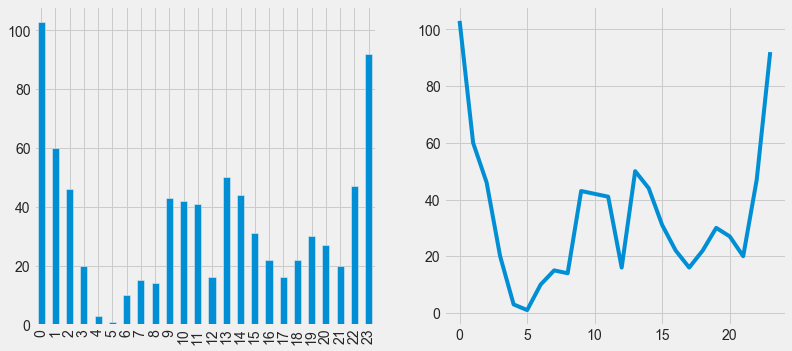

In [44]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
df.loc[df.sort_values(by="stop_time").drugs_related_stop, 'stop_time'].value_counts().sort_index().plot(kind="bar")

plt.subplot(2, 2, 2)
df.loc[df.sort_values(by="stop_time").drugs_related_stop, 'stop_time'].value_counts().sort_index().plot()

**Lessons:**

- Use plots to help you understand trends
- Create exploratory plots using pandas one-liners

# 8. Do most stops occur at night?

In [45]:
df.stop_time.sort_index().value_counts().sort_index()

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_time, dtype: int64

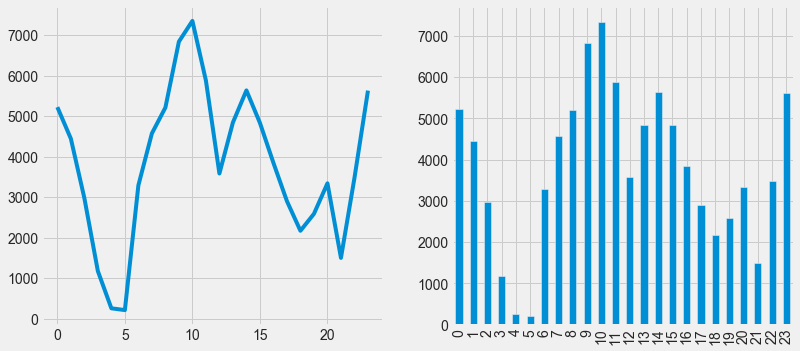

In [46]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
df.stop_time.sort_index().value_counts().sort_index().plot()

plt.subplot(2, 2, 2)
df.stop_time.sort_index().value_counts().sort_index().plot(kind="bar")

**Lessons:**

- Be conscious of sorting when plotting

# 9. Find the bad data in the stop_duration column and fix it 

In [47]:
df.stop_duration.isnull().sum()

5333

In [48]:
df.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', nan, '2', '1'], dtype=object)

In [49]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [50]:
# ri.stop_duration.replace(['1', '2'], value=np.nan, inplace=True)
df.loc[(df.stop_duration == '1')| (df.stop_duration == '2'), 'stop_duration'] = np.nan

In [51]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

**Lessons:**

- Ambiguous data should be marked as missing
- NaN is not a string

# 10. What is the mean stop_duration for each violation_raw?

In [52]:
df.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', nan], dtype=object)

In [53]:
df.violation_raw.value_counts()

Speeding                            48463
Other Traffic Violation             16224
Equipment/Inspection Violation      11020
Registration Violation               3432
Seatbelt Violation                   2952
Special Detail/Directed Patrol       2455
Call for Service                     1298
Violation of City/Town Ordinance      211
Motorist Assist/Courtesy              203
APB                                    79
Suspicious Person                      56
Warrant                                15
Name: violation_raw, dtype: int64

In [54]:
df.groupby('stop_duration').violation_raw.value_counts()

stop_duration  violation_raw                   
0-15 Min       Speeding                            41014
               Other Traffic Violation             11763
               Equipment/Inspection Violation       9173
               Seatbelt Violation                   2665
               Registration Violation               2421
               Special Detail/Directed Patrol       1622
               Call for Service                      547
               Violation of City/Town Ordinance      144
               Motorist Assist/Courtesy              119
               APB                                    37
               Suspicious Person                      32
               Warrant                                 6
16-30 Min      Speeding                             6848
               Other Traffic Violation              3150
               Equipment/Inspection Violation       1373
               Registration Violation                804
               Special Detail/Directed P

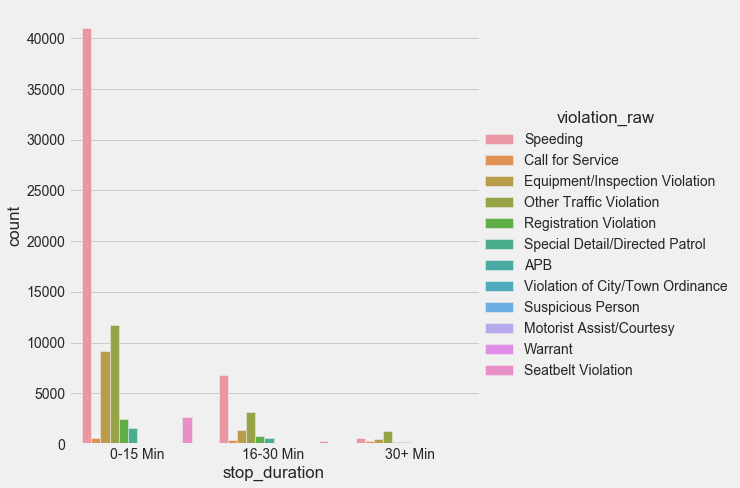

In [55]:
sns.catplot("stop_duration", data=df, hue="violation_raw", kind="count", height=7)

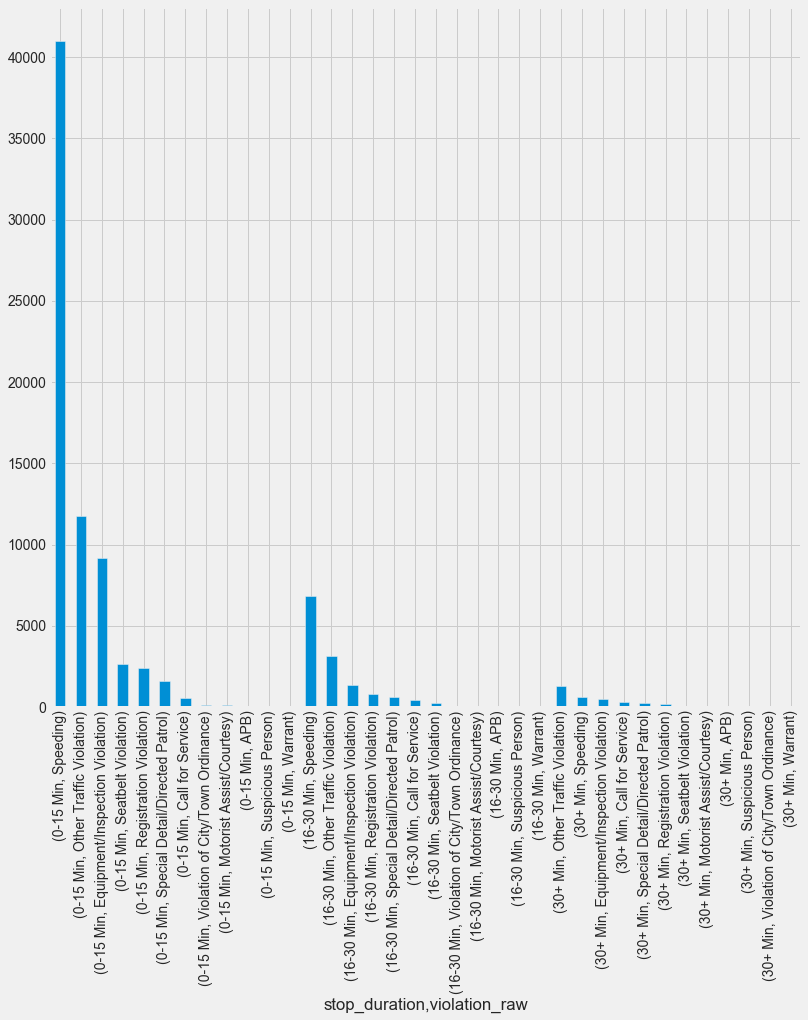

In [56]:
plt.figure(figsize=(12, 12))
df.groupby('stop_duration').violation_raw.value_counts().plot(kind="bar")

In [57]:
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
df['stop_minutes'] = df.stop_duration.map(mapping)

In [58]:
df.stop_minutes.value_counts()

8.0     69543
23.0    13635
45.0     3228
Name: stop_minutes, dtype: int64

In [59]:
df.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64

In [60]:
df.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])

,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


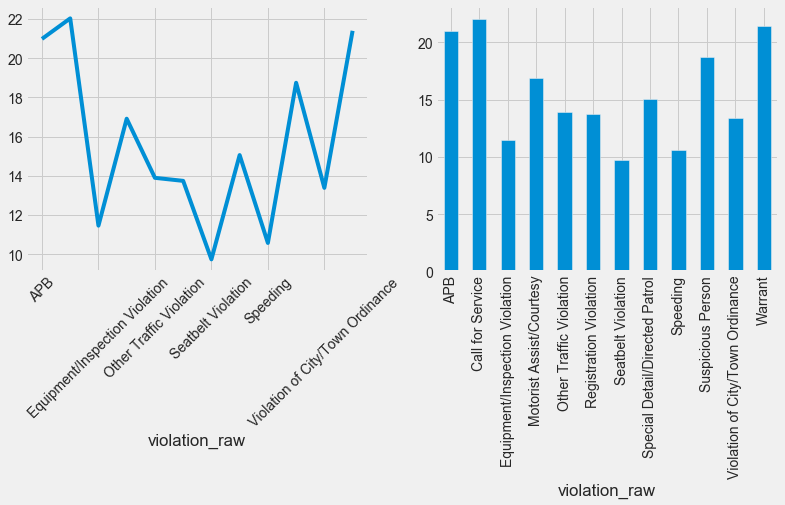

In [61]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df.groupby('violation_raw').stop_minutes.mean().plot(rot=45)

plt.subplot(2, 2, 2)
df.groupby('violation_raw').stop_minutes.mean().plot(kind="bar")

**Lessons:**

- Convert strings to numbers for analysis
- Approximate when necessary
- Use count with mean to looking for meaningless means

# 11. Compare the age distributions for each violation

In [62]:
df.groupby("violation").driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


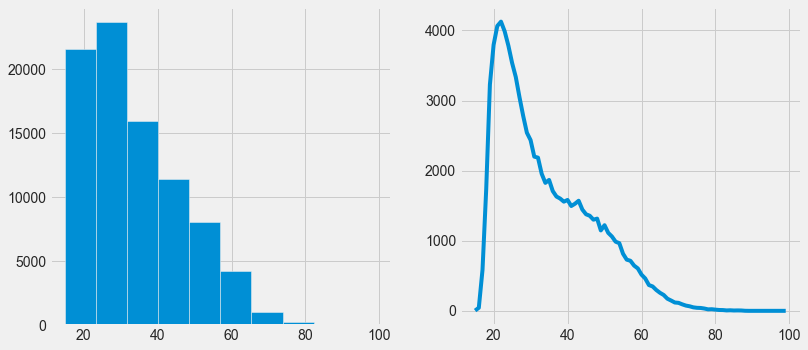

In [63]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
df.driver_age.hist(bins=10)

plt.subplot(2, 2, 2)
df.driver_age.value_counts().sort_index().plot()

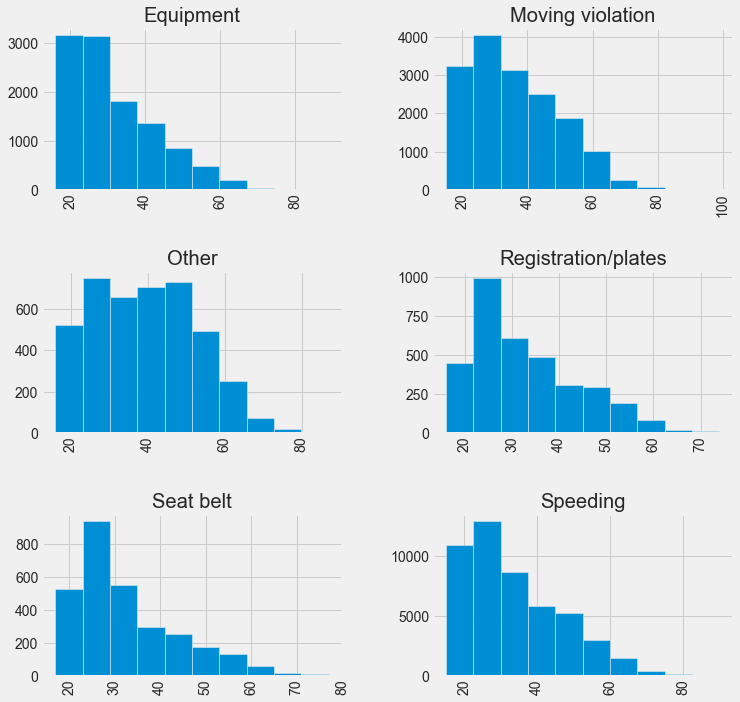

In [64]:
df.hist('driver_age', by='violation', figsize=(12, 12));

**Lessons:**

- Use histograms to show distributions
- Be conscious of axes when using grouped plots